# Loan Approval Prediction Assignment

Overview - The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing The Dependencies

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load The Dataset

In [236]:
train_data = pd.read_csv('/content/Training Dataset.csv')
test_data = pd.read_csv('/content/Test Dataset.csv')

In [237]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [238]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [239]:
train_data.shape

(614, 13)

In [240]:
test_data.shape

(367, 12)

In [241]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [242]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [243]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Checking For Null Values

In [244]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [245]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [246]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [247]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

# Handling Null Values

In [248]:
train_data.drop(["Dependents"], axis=1, inplace=True)
test_data.drop(["Dependents"], axis=1, inplace=True)

In [249]:
cols = train_data[["Gender","Married","Self_Employed"]]
col1 = test_data[["Gender","Self_Employed"]]

In [250]:
for i in cols:
  train_data[i].fillna(train_data[i].mode().iloc[0], inplace = True)


In [251]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [252]:
for i in col1:
   test_data[j].fillna(train_data[j].mode().iloc[0], inplace = True)

In [253]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [254]:
#dealing with Numerical variables
col_2 = train_data[["Loan_Amount_Term","Credit_History","LoanAmount"]]
for i in col_2:
  train_data[i].fillna(train_data[i].mean(axis=0), inplace=True)

In [255]:
#dealing with Numerical variables
col_3 = test_data[["Loan_Amount_Term","Credit_History","LoanAmount"]]
for i in col_3:
  test_data[i].fillna(test_data[i].mean(axis=0), inplace=True)

In [256]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [257]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

# Visualization

In [258]:
def bar_chart(col):
 App = train_data[train_data["Loan_Status"]=="Y"][col].value_counts()
 Dis_App = train_data[train_data["Loan_Status"]=="N"][col].value_counts()

 df = pd.DataFrame([App,Dis_App])
 df.index = ["App","Dis_App"]
 df.plot(kind="bar")

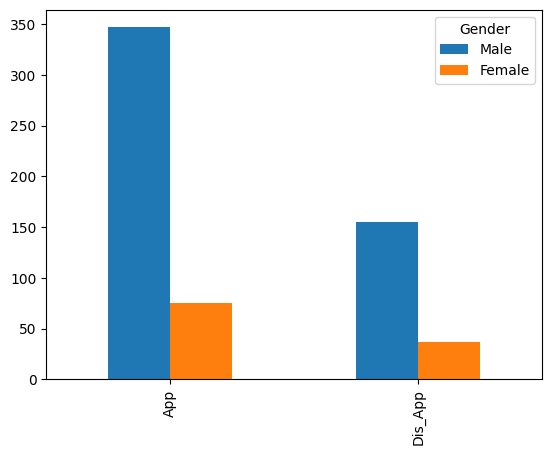

In [259]:
bar_chart("Gender")

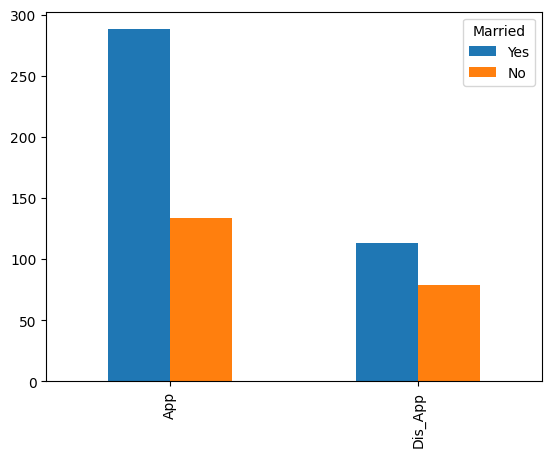

In [260]:
bar_chart("Married")

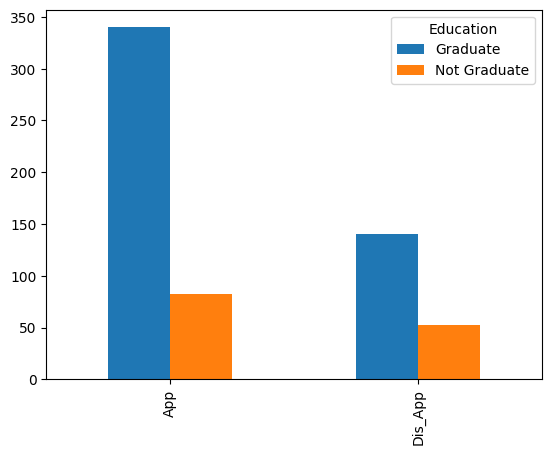

In [261]:
bar_chart("Education")

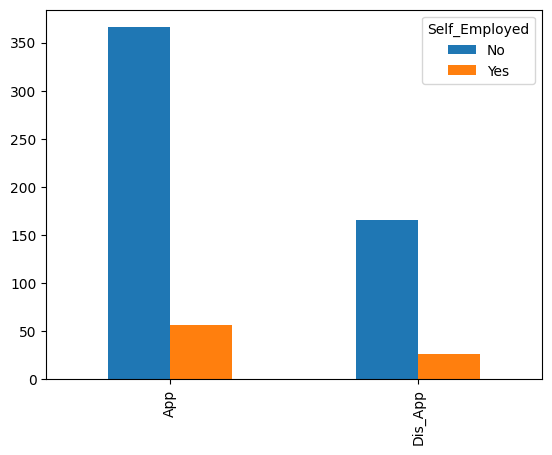

In [262]:
bar_chart("Self_Employed")

# Encoding

In [263]:
from sklearn.preprocessing import OrdinalEncoder

In [264]:
ord_enc = OrdinalEncoder()
train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]= ord_enc.fit_transform(train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]])

In [265]:
ord_enc = OrdinalEncoder()
test_data[["Gender","Married","Education","Self_Employed","Property_Area"]]= ord_enc.fit_transform(test_data[["Gender","Married","Education","Self_Employed","Property_Area"]])

In [266]:
train_data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [267]:
test_data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1.0,0.0,0.0,5720,0,110.0,360.0,1.000000,2.0
1,LP001022,1.0,1.0,0.0,0.0,3076,1500,126.0,360.0,1.000000,2.0
2,LP001031,1.0,1.0,0.0,0.0,5000,1800,208.0,360.0,1.000000,2.0
3,LP001035,1.0,1.0,0.0,0.0,2340,2546,100.0,360.0,0.825444,2.0
4,LP001051,1.0,0.0,1.0,0.0,3276,0,78.0,360.0,1.000000,2.0


In [270]:
train_data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]].astype('int')

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1
...,...,...,...,...,...,...
609,0,0,0,0,0,1
610,1,1,0,0,0,1
611,1,1,0,0,2,1
612,1,1,0,0,2,1


In [280]:
train_data = train_data.drop("Loan_ID",axis=1)

In [281]:
from sklearn.model_selection import train_test_split
X = train_data.drop("Loan_Status",axis=1)
y = train_data["Loan_Status"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [282]:
X_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
222,1.0,0.0,0.0,0.0,2971,2791.0,144.0,360.0,1.0,1.0
281,1.0,1.0,0.0,0.0,3927,800.0,112.0,360.0,1.0,1.0
372,1.0,1.0,0.0,1.0,9323,7873.0,380.0,300.0,1.0,0.0
32,1.0,0.0,0.0,1.0,4692,0.0,106.0,360.0,1.0,0.0
204,1.0,1.0,1.0,0.0,3917,0.0,124.0,360.0,1.0,1.0


In [283]:
print(X_train.shape,y_train.shape)

(491, 10) (491,)


In [284]:
from sklearn.naive_bayes import GaussianNB

In [285]:
gfc = GaussianNB()
gfc.fit(X_train, y_train)
prediction = gfc.predict(X_test)

In [286]:
prediction

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1.])

In [287]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [288]:
def loss(y_true, y_pred):
  pred = precision_score(y_true,y_pred)
  rec = recall_score(y_true,y_pred)
  acc = accuracy_score(y_true,y_pred)

  print(pred)
  print(rec)
  print(acc)

In [289]:
loss(y_test,prediction)

0.7766990291262136
0.9523809523809523
0.7804878048780488
